# 2(c) - part 2

# *Visualizing the coefficients across the two years 2006 and 2007 for - part 1*

## - Importing the necessary libraries for this segment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## - Importing the data for 2006 and 2007

In [2]:
coefficients_dataset2006 = pd.read_csv (r"C:\Users\user\Downloads\Programming\Akithmi Final Python Files\coefficients_table_NEW_2006.csv")
coefficients_dataset2007 = pd.read_csv (r"C:\Users\user\Downloads\Programming\Akithmi Final Python Files\coefficients_table_NEW_2007.csv")

In [3]:
# Transpose the datasets and set 'Feature' column as index
coefficients_transposed_2006 = coefficients_dataset2006.set_index('Feature').T
coefficients_transposed_2007 = coefficients_dataset2007.set_index('Feature').T

# Rename the index to None to remove it
coefficients_transposed_2006.index.name = None
coefficients_transposed_2007.index.name = None

In [4]:
coefficients_transposed_2006

Feature,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,DepDelay,...,country_origin,lat_origin,long_origin,iata_dest,state_dest,country_dest,lat_dest,long_dest,UniqueCarrier_code,Intercept
Coefficient,0.0,-0.014644,0.036303,0.033188,-0.083637,-0.04101,0.120281,0.137366,-0.198518,2.646037,...,0.0,0.061567,0.116544,-0.075153,0.163625,0.0,-0.020568,0.038901,0.02096,-2.010785


In [5]:
coefficients_transposed_2007

Feature,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,DepDelay,...,country_origin,lat_origin,long_origin,iata_dest,state_dest,country_dest,lat_dest,long_dest,UniqueCarrier_code,Intercept
Coefficient,0.0,-0.019559,0.041216,-0.013648,-0.059438,-0.072708,0.08636,0.07056,-0.427918,3.16648,...,0.0,0.007066,0.013576,-0.123676,0.235429,0.0,-0.035975,0.086134,0.036134,-1.956531


In [6]:
coefficients_transposed_2006['data_year'] = 2006
coefficients_transposed_2007['data_year'] = 2007

In [7]:
# Concatenate the two transposed datasets horizontally
merged_coefficients = pd.concat([coefficients_transposed_2006, coefficients_transposed_2007], axis=0)

# Reset index to have default index
merged_coefficients.reset_index(drop=True, inplace=True)

merged_coefficients

Feature,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,DepDelay,...,lat_origin,long_origin,iata_dest,state_dest,country_dest,lat_dest,long_dest,UniqueCarrier_code,Intercept,data_year
0,0.0,-0.014644,0.036303,0.033188,-0.083637,-0.041010,0.120281,0.137366,-0.198518,2.646037,...,0.061567,0.116544,-0.075153,0.163625,0.0,-0.020568,0.038901,0.020960,-2.010785,2006
1,0.0,-0.019559,0.041216,-0.013648,-0.059438,-0.072708,0.086360,0.070560,-0.427918,3.166480,...,0.007066,0.013576,-0.123676,0.235429,0.0,-0.035975,0.086134,0.036134,-1.956531,2007


In [8]:
merged_coefficients.to_csv(r"C:\Users\user\Desktop\progdata\merged_coefficients.csv",index=False)

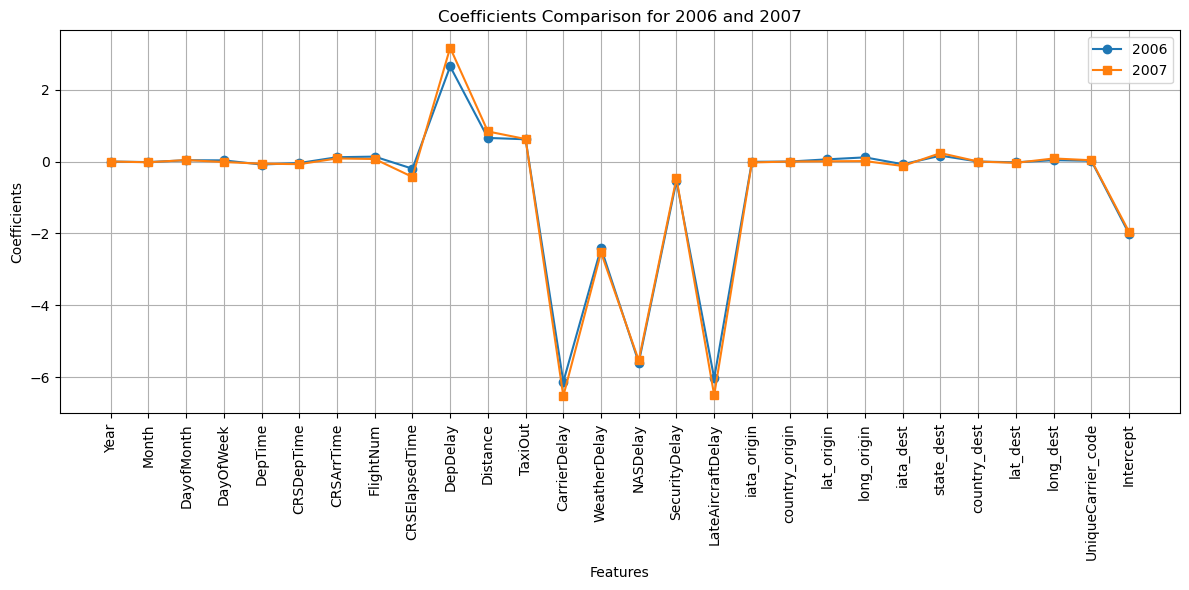

In [9]:
# Extract data for each year
coefficients_2006 = merged_coefficients[merged_coefficients['data_year'] == 2006].drop(columns=['data_year'])
coefficients_2007 = merged_coefficients[merged_coefficients['data_year'] == 2007].drop(columns=['data_year'])

# Plotting
plt.figure(figsize=(12, 6))

# Plot coefficients for 2006
plt.plot(coefficients_2006.columns, coefficients_2006.iloc[0], marker='o', label='2006')

# Plot coefficients for 2007
plt.plot(coefficients_2007.columns, coefficients_2007.iloc[0], marker='s', label='2007')

plt.title('Coefficients Comparison for 2006 and 2007')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


# (1) Analysing Departure Date Attribute 

In [10]:
# Assuming 'merged_coefficients' is your DataFrame
desired_columns = ['data_year']+ ['Year'] + ['Month'] + ['DayofMonth'] + ['DayOfWeek'] + ['DepTime']

# Extracting the desired columns
dep_date = merged_coefficients[desired_columns]

# Displaying the extracted columns
dep_date

Feature,data_year,Year,Month,DayofMonth,DayOfWeek,DepTime
0,2006,0.0,-0.014644,0.036303,0.033188,-0.083637
1,2007,0.0,-0.019559,0.041216,-0.013648,-0.059438


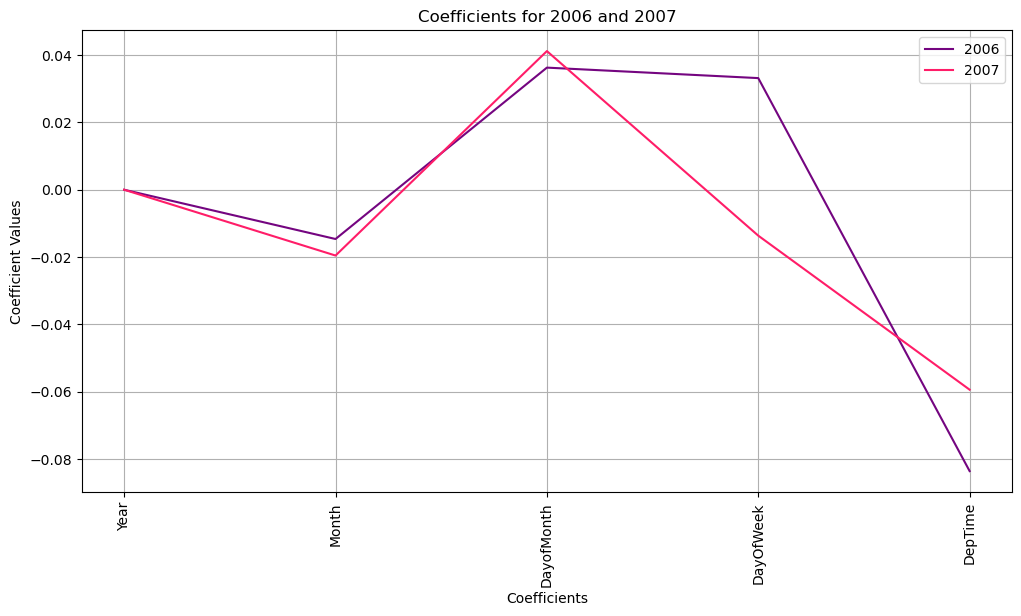

In [11]:
# Filter data for 2006 and 2007
data_2006 = dep_date[dep_date['data_year'] == 2006].iloc[:, 1:]
data_2007 = dep_date[dep_date['data_year'] == 2007].iloc[:, 1:]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for 2006
plt.plot(data_2006.columns, data_2006.values.flatten(), label='2006', color='#740580')

# Plot for 2007
plt.plot(data_2007.columns, data_2007.values.flatten(), label='2007', color='#ff1d68')

plt.xlabel('Coefficients')
plt.ylabel('Coefficient Values')
plt.title('Coefficients for 2006 and 2007')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

# (2) Scheduled Departure and Arrival times 

In [12]:
# Assuming 'merged_coefficients' is your DataFrame
desired_columns = ['data_year']+ ['CRSDepTime'] + ['CRSArrTime'] + ['CRSElapsedTime'] + ['DepDelay'] + ['NASDelay'] + ['LateAircraftDelay'] + ['WeatherDelay'] + ['SecurityDelay'] + ['CarrierDelay']

# Extracting the desired columns
CRS_ArrDep = merged_coefficients[desired_columns]

# Displaying the extracted columns
CRS_ArrDep

Feature,data_year,CRSDepTime,CRSArrTime,CRSElapsedTime,DepDelay,NASDelay,LateAircraftDelay,WeatherDelay,SecurityDelay,CarrierDelay
0,2006,-0.041010,0.120281,-0.198518,2.646037,-5.595755,-6.027652,-2.405843,-0.537673,-6.128595
1,2007,-0.072708,0.086360,-0.427918,3.166480,-5.533012,-6.502053,-2.529178,-0.463245,-6.524980


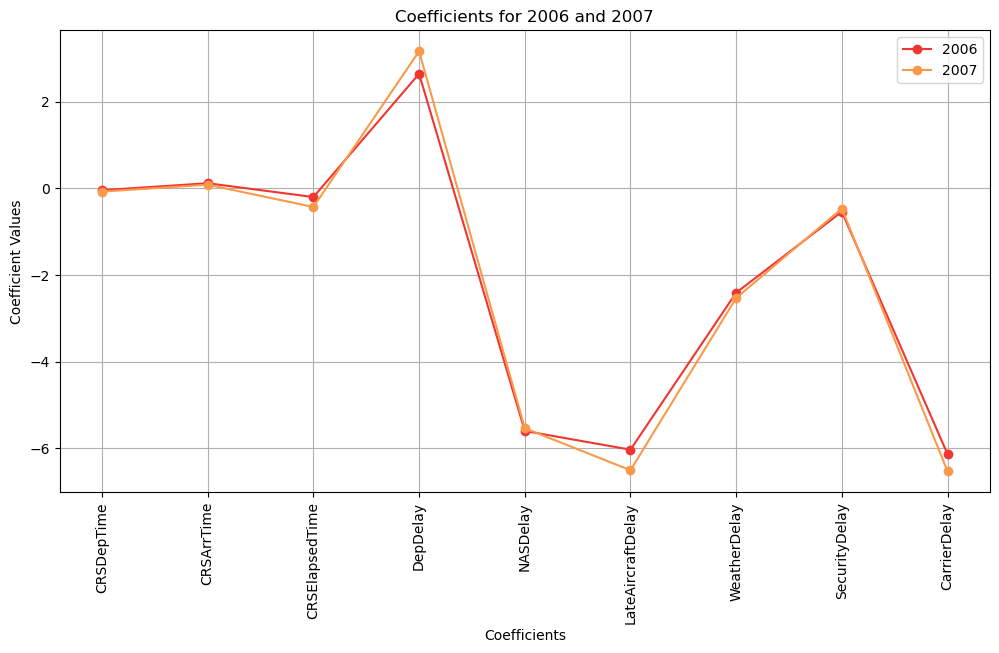

In [13]:
# Filter data for 2006 and 2007
CRS_data_2006 = CRS_ArrDep[CRS_ArrDep['data_year'] == 2006].iloc[:, 1:]
CRS_data_2007 = CRS_ArrDep[CRS_ArrDep['data_year'] == 2007].iloc[:, 1:]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for 2006
plt.plot(CRS_data_2006.columns, CRS_data_2006.values.flatten(), 'o-', label='2006', color='#f03630')

# Plot for 2007
plt.plot(CRS_data_2007.columns, CRS_data_2007.values.flatten(), 'o-', label='2007', color='#fa994a')

plt.xlabel('Coefficients')
plt.ylabel('Coefficient Values')
plt.title('Coefficients for 2006 and 2007')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()


# (3) Coordinates and Distance between the dep and planned arrival airports

In [18]:
# Additional columns to extract
num_columns = ['data_year', 'lat_origin', 'long_origin', 'lat_dest', 'long_dest', 'country_origin', 'country_dest','state_dest', 'iata_origin', 'iata_dest' ]
ArrDep_airports_num = merged_coefficients[num_columns]
ArrDep_airports_num

Feature,data_year,lat_origin,long_origin,lat_dest,long_dest,country_origin,country_dest,state_dest,iata_origin,iata_dest
0,2006,0.061567,0.116544,-0.020568,0.038901,0.0,0.0,0.163625,-0.006838,-0.075153
1,2007,0.007066,0.013576,-0.035975,0.086134,0.0,0.0,0.235429,-0.024787,-0.123676


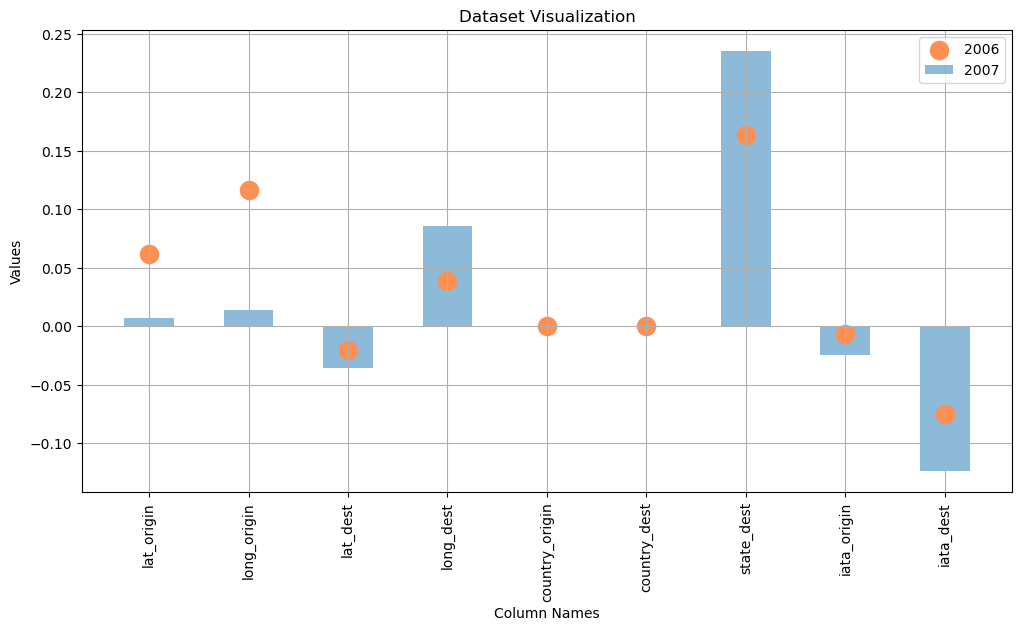

In [22]:
# Given data
data_year = [2006, 2007]
lat_origin = [0.061567, 0.007066]
long_origin = [0.116544, 0.013576]
lat_dest = [-0.020568, -0.035975]
long_dest = [0.038901, 0.086134]
country_origin = [0.0, 0.0]
country_dest = [0.0, 0.0]
state_dest = [0.163625, 0.235429]
iata_origin = [-0.006838, -0.024787]
iata_dest = [-0.075153, -0.123676]

# Plot
plt.figure(figsize=(12, 6))

# Define colors for the bars and circles
bar_color = '#c73866'

# Plot bars for 2007
plt.bar(columns, values_2007, alpha=0.5, label='2007', width=0.5)

# Plot circles for 2006
plt.scatter(columns, values_2006, color='#fd8f52', marker='o', label='2006', s=170)

plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('Dataset Visualization')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

# (4) The Carrier

In [20]:
carrier_cols = ['data_year']  + ['UniqueCarrier_code'] 
carrier_data = merged_coefficients[carrier_cols]
carrier_data

Feature,data_year,UniqueCarrier_code
0,2006,0.020960
1,2007,0.036134


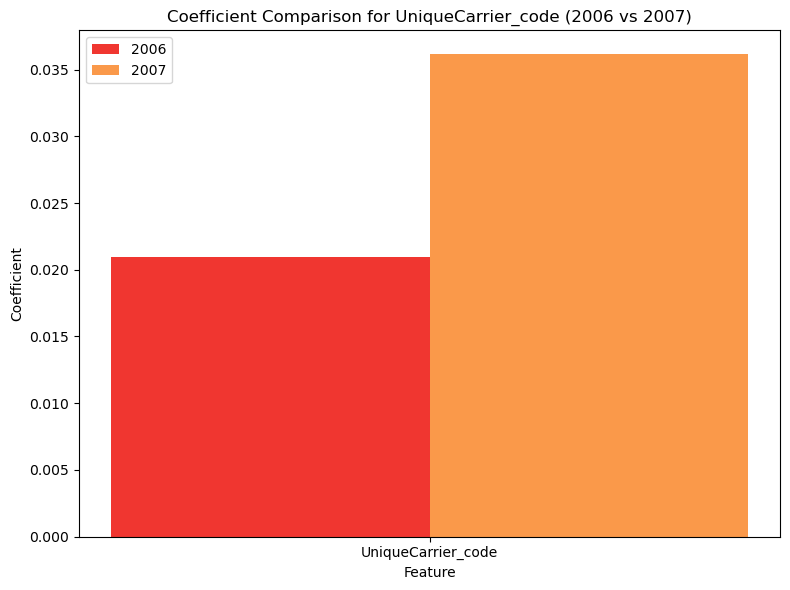

In [21]:
# Sample data
data = {
    'Feature': ['UniqueCarrier_code'],
    '2006': [0.020960],
    '2007': [0.036134]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(8, 6))

# Bar plot for 2006
plt.bar(np.arange(len(df['Feature'])) - 0.2, df['2006'], width=0.4, align='center', label='2006', color='#f03630')

# Bar plot for 2007
plt.bar(np.arange(len(df['Feature'])) + 0.2, df['2007'], width=0.4, align='center', label='2007', color='#fa994a')

# Set x-axis ticks and labels
plt.xticks(np.arange(len(df['Feature'])), df['Feature'])

# Set plot title and labels
plt.title('Coefficient Comparison for UniqueCarrier_code (2006 vs 2007)')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()